In [94]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import math

In [95]:
from sklearn.datasets import make_classification

In [96]:
x, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, n_repeated=0, random_state=42)
x, y

(array([[ 1.22831184, -0.75717844],
        [ 0.69840909, -1.38029525],
        [ 2.54881729,  2.50225822],
        [ 0.57357881, -1.35297943],
        [ 0.58590018, -1.33745666],
        [ 0.63356167, -1.17278867],
        [ 0.55656344, -1.31038476],
        [ 0.12437227,  0.19896733],
        [ 1.32272135, -0.59340317],
        [ 1.42586898,  1.39002959],
        [ 0.63944087, -1.23395477],
        [ 1.2349949 , -0.73168763],
        [ 0.73902766,  0.82180719],
        [ 2.22140553,  2.10036638],
        [ 3.08402116,  2.83324852],
        [ 1.00183089, -1.02646717],
        [ 1.03307436, -0.85545993],
        [ 0.10320711,  0.21791213],
        [ 0.57885884,  0.56599415],
        [ 1.71073996,  1.56900774],
        [ 1.1586864 , -0.88167436],
        [ 3.07317945,  2.84564176],
        [ 1.88782031, -0.36699364],
        [ 0.48727907,  0.59970882],
        [ 3.07752729,  2.90114736],
        [ 0.22485502,  0.29482153],
        [ 1.12991576,  1.10236134],
        [ 0.85095512, -1.184

In [97]:
x.shape, y.shape

((100, 2), (100,))

<Axes: >

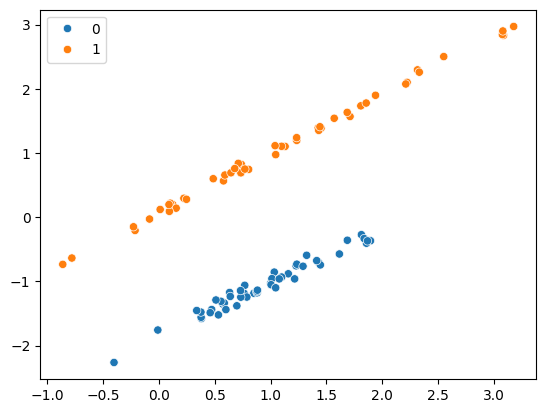

In [98]:
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2, stratify=y)

In [101]:
class KNN:
    def __init__(self, neighbours=5):
        self.neigbours = neighbours


    def fit(self, x, y):
        self.x = x
        self.y = y

        if len(self.x.shape) == 1:
            self.n_dims = 1
        else:
            self.n_dims = self.x.shape[1]


    def predict(self, x):
        y_pred = []
        for i in range(x.shape[0]):
            neigbours_indices = []
            for j in range(self.neigbours):
                closest_index = self._find_closest(x[i], neigbours_indices)
                neigbours_indices.append(closest_index)            
            y_pred.append(self._most_common([self.y[index] for index in neigbours_indices]))

        return y_pred


    def  _find_closest(self, x, neigbours_indices):
        sample_size = self.x.shape[0]

        min_index = 0
        min_distance = math.inf
        for i in range(sample_size):
            if i in neigbours_indices:
                continue
            sum = 0.0
            for j in range(self.n_dims):
                sum += (x[j] - self.x[i][j]) ** 2
            distance = math.sqrt(sum)
            if distance < min_distance:
                min_index = i
                min_distance = distance
        
        return min_index
    

    def _most_common(self, lst):
        return max(set(lst), key=lst.count)


    def score(self, x, y):
        y_pred = self.predict(x)
        return accuracy_score(y_pred=y_pred, y_true=y)



In [102]:
clf = KNN()
clf.fit(x_train, y_train)

In [103]:
clf.score(x_train, y_train)

1.0

In [104]:
clf.score(x_test, y_test)

1.0